<Body>   
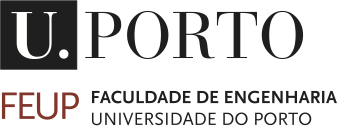   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Mar. 2024

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** both the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.

**Deadlines:** Present the state of your work (and answer questions) on the week of **March 18** in your corresponding practical class. Upload the files until 23:59 of **March 27, 2024**.


---



In [18]:
# To make a nice pdf file of this file, you have to do the following:
# - upload this file into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "ML_project1.ipynb"
# Then just download the html file and print it to pdf!

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.


# **Identification**

* **Group:** xx
* **Name:** xxx
* **Student Number:**

* **Name:**
* **Student Number:**


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [19]:
#!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
#!unzip dataset.csv.zip -d.


In [20]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df.head(11)
df.tail()
#df

# By convention, values that are zero signify no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
495,49.5,3.855108,-3.928327,-0.078142,-0.093745,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,49.6,0.000000,0.000000,-0.088140,-0.103430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,49.7,0.000000,0.000000,-0.078002,-0.092986,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,49.8,0.000000,0.000000,-0.076514,-0.091199,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,49.9,0.000000,0.000000,-0.078499,-0.092891,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Visualize Data:**

Plot the data from the csv dataset

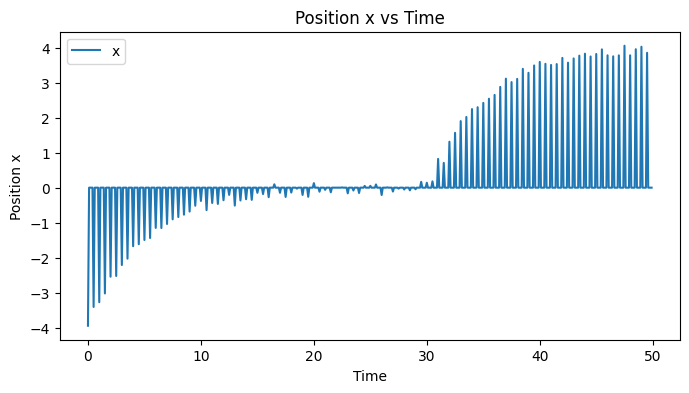

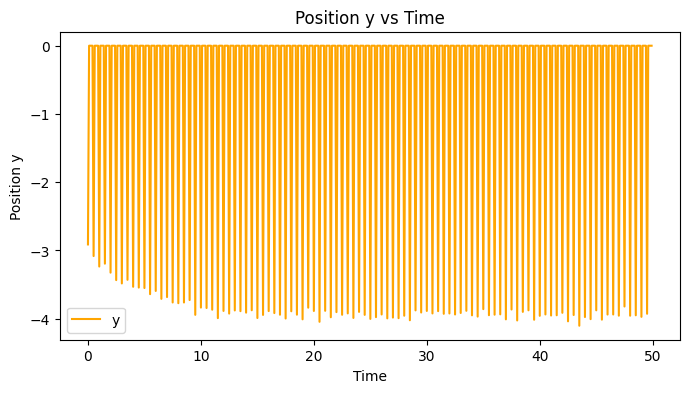

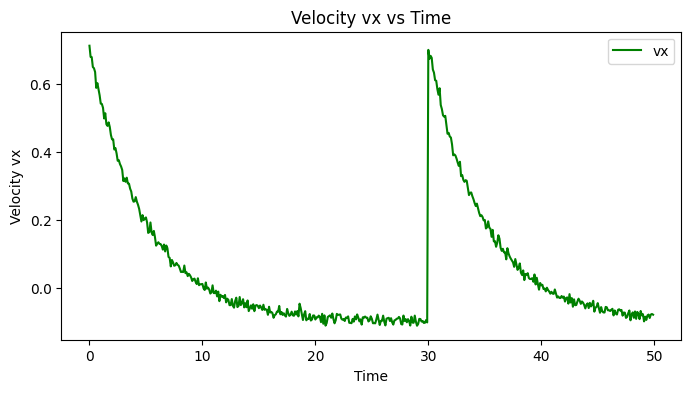

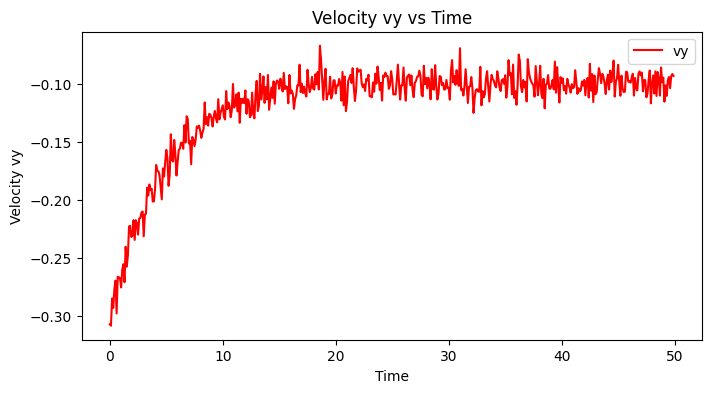

In [21]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values

# Plotting x
plt.figure(figsize=(8, 4))
plt.plot(time, x, label='x')
plt.title('Position x vs Time')
plt.xlabel('Time')
plt.ylabel('Position x')
plt.legend()
plt.show()

# Plotting y
plt.figure(figsize=(8, 4))
plt.plot(time, y, label='y', color='orange')
plt.title('Position y vs Time')
plt.xlabel('Time')
plt.ylabel('Position y')
plt.legend()
plt.show()

# Plotting vx
plt.figure(figsize=(8, 4))
plt.plot(time, vx, label='vx', color='green')
plt.title('Velocity vx vs Time')
plt.xlabel('Time')
plt.ylabel('Velocity vx')
plt.legend()
plt.show()

# Plotting vy
plt.figure(figsize=(8, 4))
plt.plot(time, vy, label='vy', color='red')
plt.title('Velocity vy vs Time')
plt.xlabel('Time')
plt.ylabel('Velocity vy')
plt.legend()
plt.show()

# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!

### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


*x-direction*

\begin{align*}
    \begin{bmatrix}
    x_{t+1} \\
    b_{x,t+1}
    \end{bmatrix}
    &= \begin{bmatrix}
    1 &h \\
    0 &1
    \end{bmatrix}

    \begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t} + w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t} &=
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}


*y-direction*

\begin{align*}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t} &=
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1**
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [30]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values



In [23]:
# To complete

# ....

#
# Kalman Filter loop
#

# N_iter = len(time)    # implies dt*N_iter seconds

# for t in arange(0, N_iter):

#   U = ...
#   Y = ...

#   (X, P) = ...

#   if t%5 ==0:
#     (X, P) = ...


# End For Loop



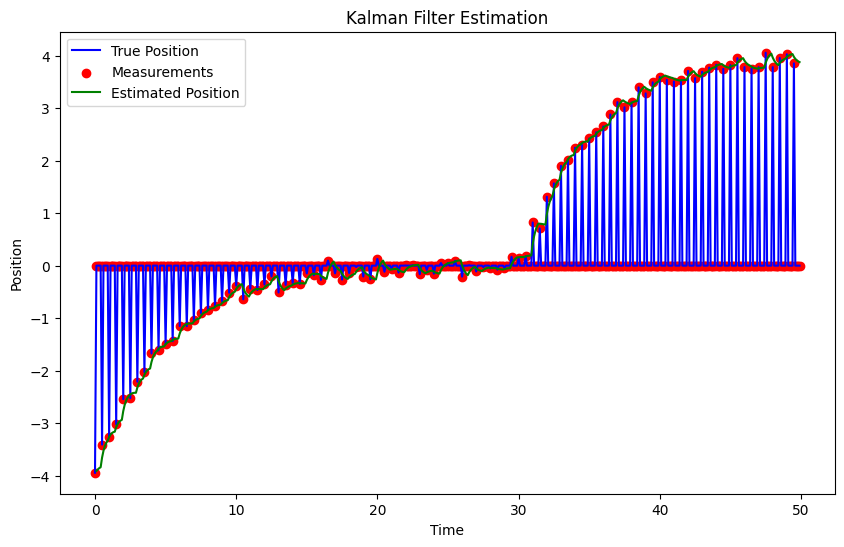

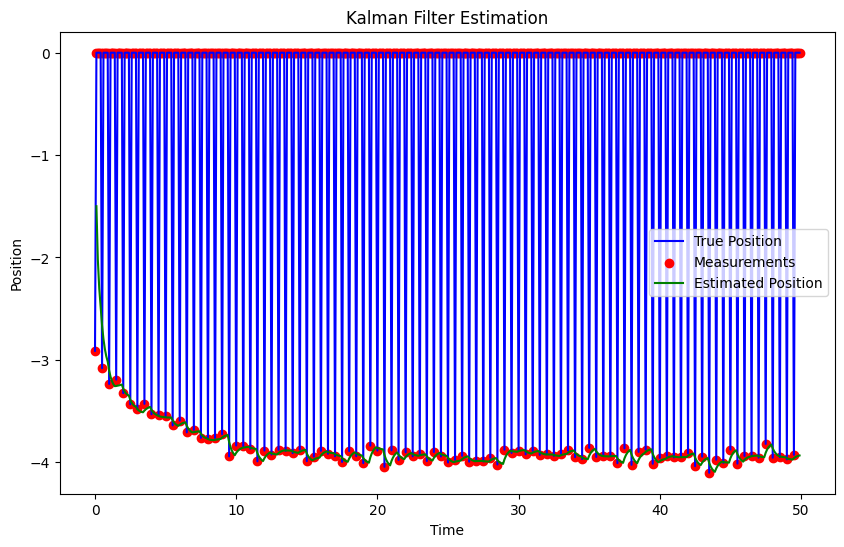

In [55]:
import numpy as np
import matplotlib.pyplot as plt


def Kalman_Filter(X, P, A, Q, R, N_iter, x):

    estimated_x = []
    Z = np.array([[x[0]]])

    for t in range(1, N_iter):
        if t%5 == 0:
            # Measurement vector
            Z = np.array([[x[t]]])

        # Prediction step
        X_pred = A @ X
        P_pred = A @ P @ A.T + Q

        # Update step
        K = P_pred @ H.T @ np.linalg.inv((H @ P_pred @ H.T) + R)
        X = X_pred + K @ (Z - H @ X_pred)
        P = (np.eye(2) - K @ H) @ P_pred

        # Save the estimated position   for plotting
        estimated_x.append(X[0, 0])                                                                             

    # Convert the list to a NumPy array for plotting
    return np.array(estimated_x)


# Assuming predefined matrices A, B, H, Q, R
# and initial state estimate X0 and initial covariance matrix P0

# Initialize state estimate and covariance matrix
X = np.array([[x[0]], [vx[0]]])  # Assuming a 2D state [position, velocity]
Y = np.array([[x[1]], [vx[1]]])  # Assuming a 2D state [position, velocity]
P = 10 * np.eye(2)  # Assuming a 2D state, initialize with identity matrix

# Kalman Filter loop
N_iter = len(time)  # Number of iterations
h = time[1] - time[0]  # Assuming a constant time step

A = np.array([[1, h], [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[1, 0], [0, 1]])
R = np.array([[10]])

estimated_x = Kalman_Filter(X, P, A, Q, R, N_iter, x)
estimated_y = Kalman_Filter(Y, P, A, Q, R, N_iter, y)

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the results
plt.plot(time, x, label='True Position', color='blue')
plt.scatter(time, x, label='Measurements', color='red', marker='o')
plt.plot(time[1:], estimated_x, label='Estimated Position', color='green')
#time_1 = np.arange(0, 99/2, 1/2)
#plt.plot(time_1, estimated_x, label='Estimated Position', color='green')

plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Kalman Filter Estimation')
plt.show()

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plotting the results
plt.plot(time, y, label='True Position', color='blue')
plt.scatter(time, y, label='Measurements', color='red', marker='o')
plt.plot(time[1:], estimated_y, label='Estimated Position', color='green')
#time_1 = np.arange(0, 99/2, 1/2)
#plt.plot(time_1, estimated_x, label='Estimated Position', color='green')

plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Kalman Filter Estimation')
plt.show()


# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is,
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

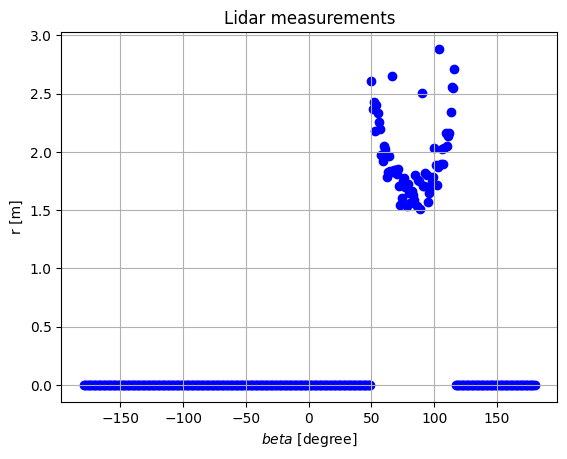

In [ ]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();



**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data,
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x }
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



In [ ]:
# Part 2.1.1

#To complete

#Build the cloud points in 2D plan
# x_o, y_o = [], []

# t=5*10 # t = 5 sec * 1/sample_time

# for i in range(len(Lidar_range[t])):
#   if Lidar_range[t][i] > 0:
#     x_o.append(...)
#     y_o.append(...)


In [ ]:
# Part 2.1.2

#To complete


**2.2**
Repeat the previous exercise but now with a polynomial model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x + \theta_2 x^2 }
 \end{equation}



In [ ]:
# To complete


**2.3**
At this point you can use sklearn!
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




In [ ]:
# To complete


**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for
$\color{green} \theta$.


In [ ]:
# To complete


**2.5 (Extra)**
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [ ]:
# To complete
